<a href="https://colab.research.google.com/github/PW-5214/AI-Product-Development-/blob/main/plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import zipfile
import os

# Path to your uploaded zip
zip_path = "/content/drive/MyDrive/archive.zip"

# Where to extract the files
extract_path = "/content/plant_dataset"

# Create folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify files
print("Dataset extracted to:", extract_path)
print("Contents:", os.listdir(extract_path))


Dataset extracted to: /content/plant_dataset
Contents: ['new plant diseases dataset(augmented)', 'test', 'New Plant Diseases Dataset(Augmented)']


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
import tensorflow as tf
import os

# Paths to train and validation folders
base_path = "/content/plant_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_path, "train")
valid_dir = os.path.join(base_path, "valid")


In [11]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [13]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [14]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[175.25 170.25 176.25]
   [185.5  180.5  186.5 ]
   [185.   180.   186.  ]
   ...
   [176.   170.   180.  ]
   [177.   171.   181.  ]
   [177.75 171.75 181.75]]

  [[179.75 174.75 180.75]
   [184.75 179.75 185.75]
   [182.25 177.25 183.25]
   ...
   [175.25 169.25 179.25]
   [175.5  169.5  179.5 ]
   [176.   170.   180.  ]]

  [[181.25 176.25 182.25]
   [180.25 175.25 181.25]
   [176.75 171.75 177.75]
   ...
   [174.   168.   178.  ]
   [173.5  167.5  177.5 ]
   [173.5  167.5  177.5 ]]

  ...

  [[131.25 118.25 125.25]
   [141.75 128.75 135.75]
   [125.75 112.75 119.75]
   ...
   [130.5  119.5  127.5 ]
   [133.25 122.25 130.25]
   [127.   116.   124.  ]]

  [[129.75 116.75 123.75]
   [130.75 117.75 124.75]
   [135.25 122.25 129.25]
   ...
   [128.75 117.75 125.75]
   [132.25 121.25 129.25]
   [126.5  115.5  123.5 ]]

  [[129.   116.   123.  ]
   [127.25 114.25 121.25]
   [129.5  116.5  123.5 ]
   ...
   [133.   122.   130.  ]
   [133.25 122.25 130.25]
   [129.   118.   12

In [15]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [22]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(units=1500,activation='relu'))

In [25]:
model.add(Dropout(0.4))

In [26]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [27]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 164s 67ms/step - accuracy: 0.4047 - loss: 2.1128 - val_accuracy: 0.8370 - val_loss: 0.5148
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 0.8354 - loss: 0.5269 - val_accuracy: 0.8953 - val_loss: 0.3219
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 147s 67ms/step - accuracy: 0.9030 - loss: 0.2982 - val_accuracy: 0.9245 - val_loss: 0.2368
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9349 - loss: 0.1999 - val_accuracy: 0.9304 - val_loss: 0.2270
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 148s 67ms/step - accuracy: 0.9514 - loss: 0.1485 - val_accuracy: 0.9479 - val_loss: 0.1698
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9610 - loss: 0.1193 - val_accuracy: 0.9531 - val_loss: 0.1586
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 0.9688 - loss: 0.0953 - val_accuracy: 0.9611 - val_loss: 0.1266
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 

In [30]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 0.9877 - loss: 0.0381


In [31]:
print(train_loss,train_acc)

0.03674689680337906 0.988121509552002


In [32]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9581 - loss: 0.1443


In [33]:
print(val_loss,val_acc)

0.13489656150341034 0.959537923336029


In [34]:
model.save("trained_model.keras")

In [35]:
training_history.history

{'accuracy': [0.6035706400871277,
  0.8583682775497437,
  0.9125969409942627,
  0.9401522278785706,
  0.9542641639709473,
  0.9645351767539978,
  0.9708656668663025,
  0.9742371439933777,
  0.9781208038330078,
  0.9818906188011169],
 'loss': [1.3492861986160278,
  0.448035329580307,
  0.26822665333747864,
  0.184686541557312,
  0.138835147023201,
  0.1092589870095253,
  0.09063984453678131,
  0.07748395204544067,
  0.06538664549589157,
  0.05777793377637863],
 'val_accuracy': [0.8370134234428406,
  0.8952879309654236,
  0.9244821071624756,
  0.9304006099700928,
  0.9478716254234314,
  0.9531072378158569,
  0.9611313343048096,
  0.9338720440864563,
  0.9549852013587952,
  0.959537923336029],
 'val_loss': [0.5148194432258606,
  0.3219480514526367,
  0.23680168390274048,
  0.22698509693145752,
  0.1697731912136078,
  0.1585581749677658,
  0.12656964361667633,
  0.22953073680400848,
  0.16226521134376526,
  0.13489659130573273]}

In [36]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [37]:
training_history.history['val_accuracy']

[0.8370134234428406,
 0.8952879309654236,
 0.9244821071624756,
 0.9304006099700928,
 0.9478716254234314,
 0.9531072378158569,
 0.9611313343048096,
 0.9338720440864563,
 0.9549852013587952,
 0.959537923336029]

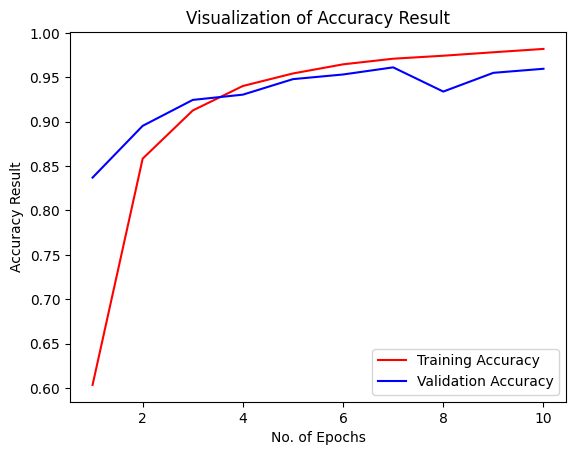

In [38]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [39]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [41]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [42]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step


(array([[9.9797207e-01, 1.0591141e-05, 1.2627933e-06, ..., 2.6054114e-09,
         4.4939665e-09, 1.9549341e-07],
        [4.4756529e-01, 3.8603536e-04, 2.1126751e-05, ..., 1.5987759e-08,
         1.1897414e-09, 5.2375901e-07],
        [9.9998283e-01, 3.7782092e-06, 8.3672717e-07, ..., 9.8472619e-11,
         7.2623596e-10, 5.4123749e-08],
        ...,
        [8.5626569e-13, 3.8804120e-16, 1.1937019e-11, ..., 6.3979647e-15,
         6.0571246e-15, 1.0000000e+00],
        [1.0717041e-11, 6.5662502e-14, 1.0915025e-10, ..., 5.6728532e-12,
         1.0580083e-12, 9.9999964e-01],
        [1.7173893e-16, 1.5996842e-16, 1.6425755e-15, ..., 8.2035538e-17,
         1.0981301e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [43]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [44]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  3,  0, ..., 37, 37, 37])>

In [45]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [46]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.88      0.93       504
                                 Apple___Black_rot       0.98      0.97      0.97       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.90      0.94      0.92       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.82      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.98      0.

In [49]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[443,   8,   1, ...,   0,   0,   0],
       [  0, 484,   3, ...,   0,   0,   0],
       [  0,   0, 431, ...,   0,   0,   2],
       ...,
       [  0,   0,   2, ..., 481,   0,   0],
       [  0,   0,   0, ...,   0, 441,   0],
       [  0,   0,   0, ...,   0,   0, 480]])

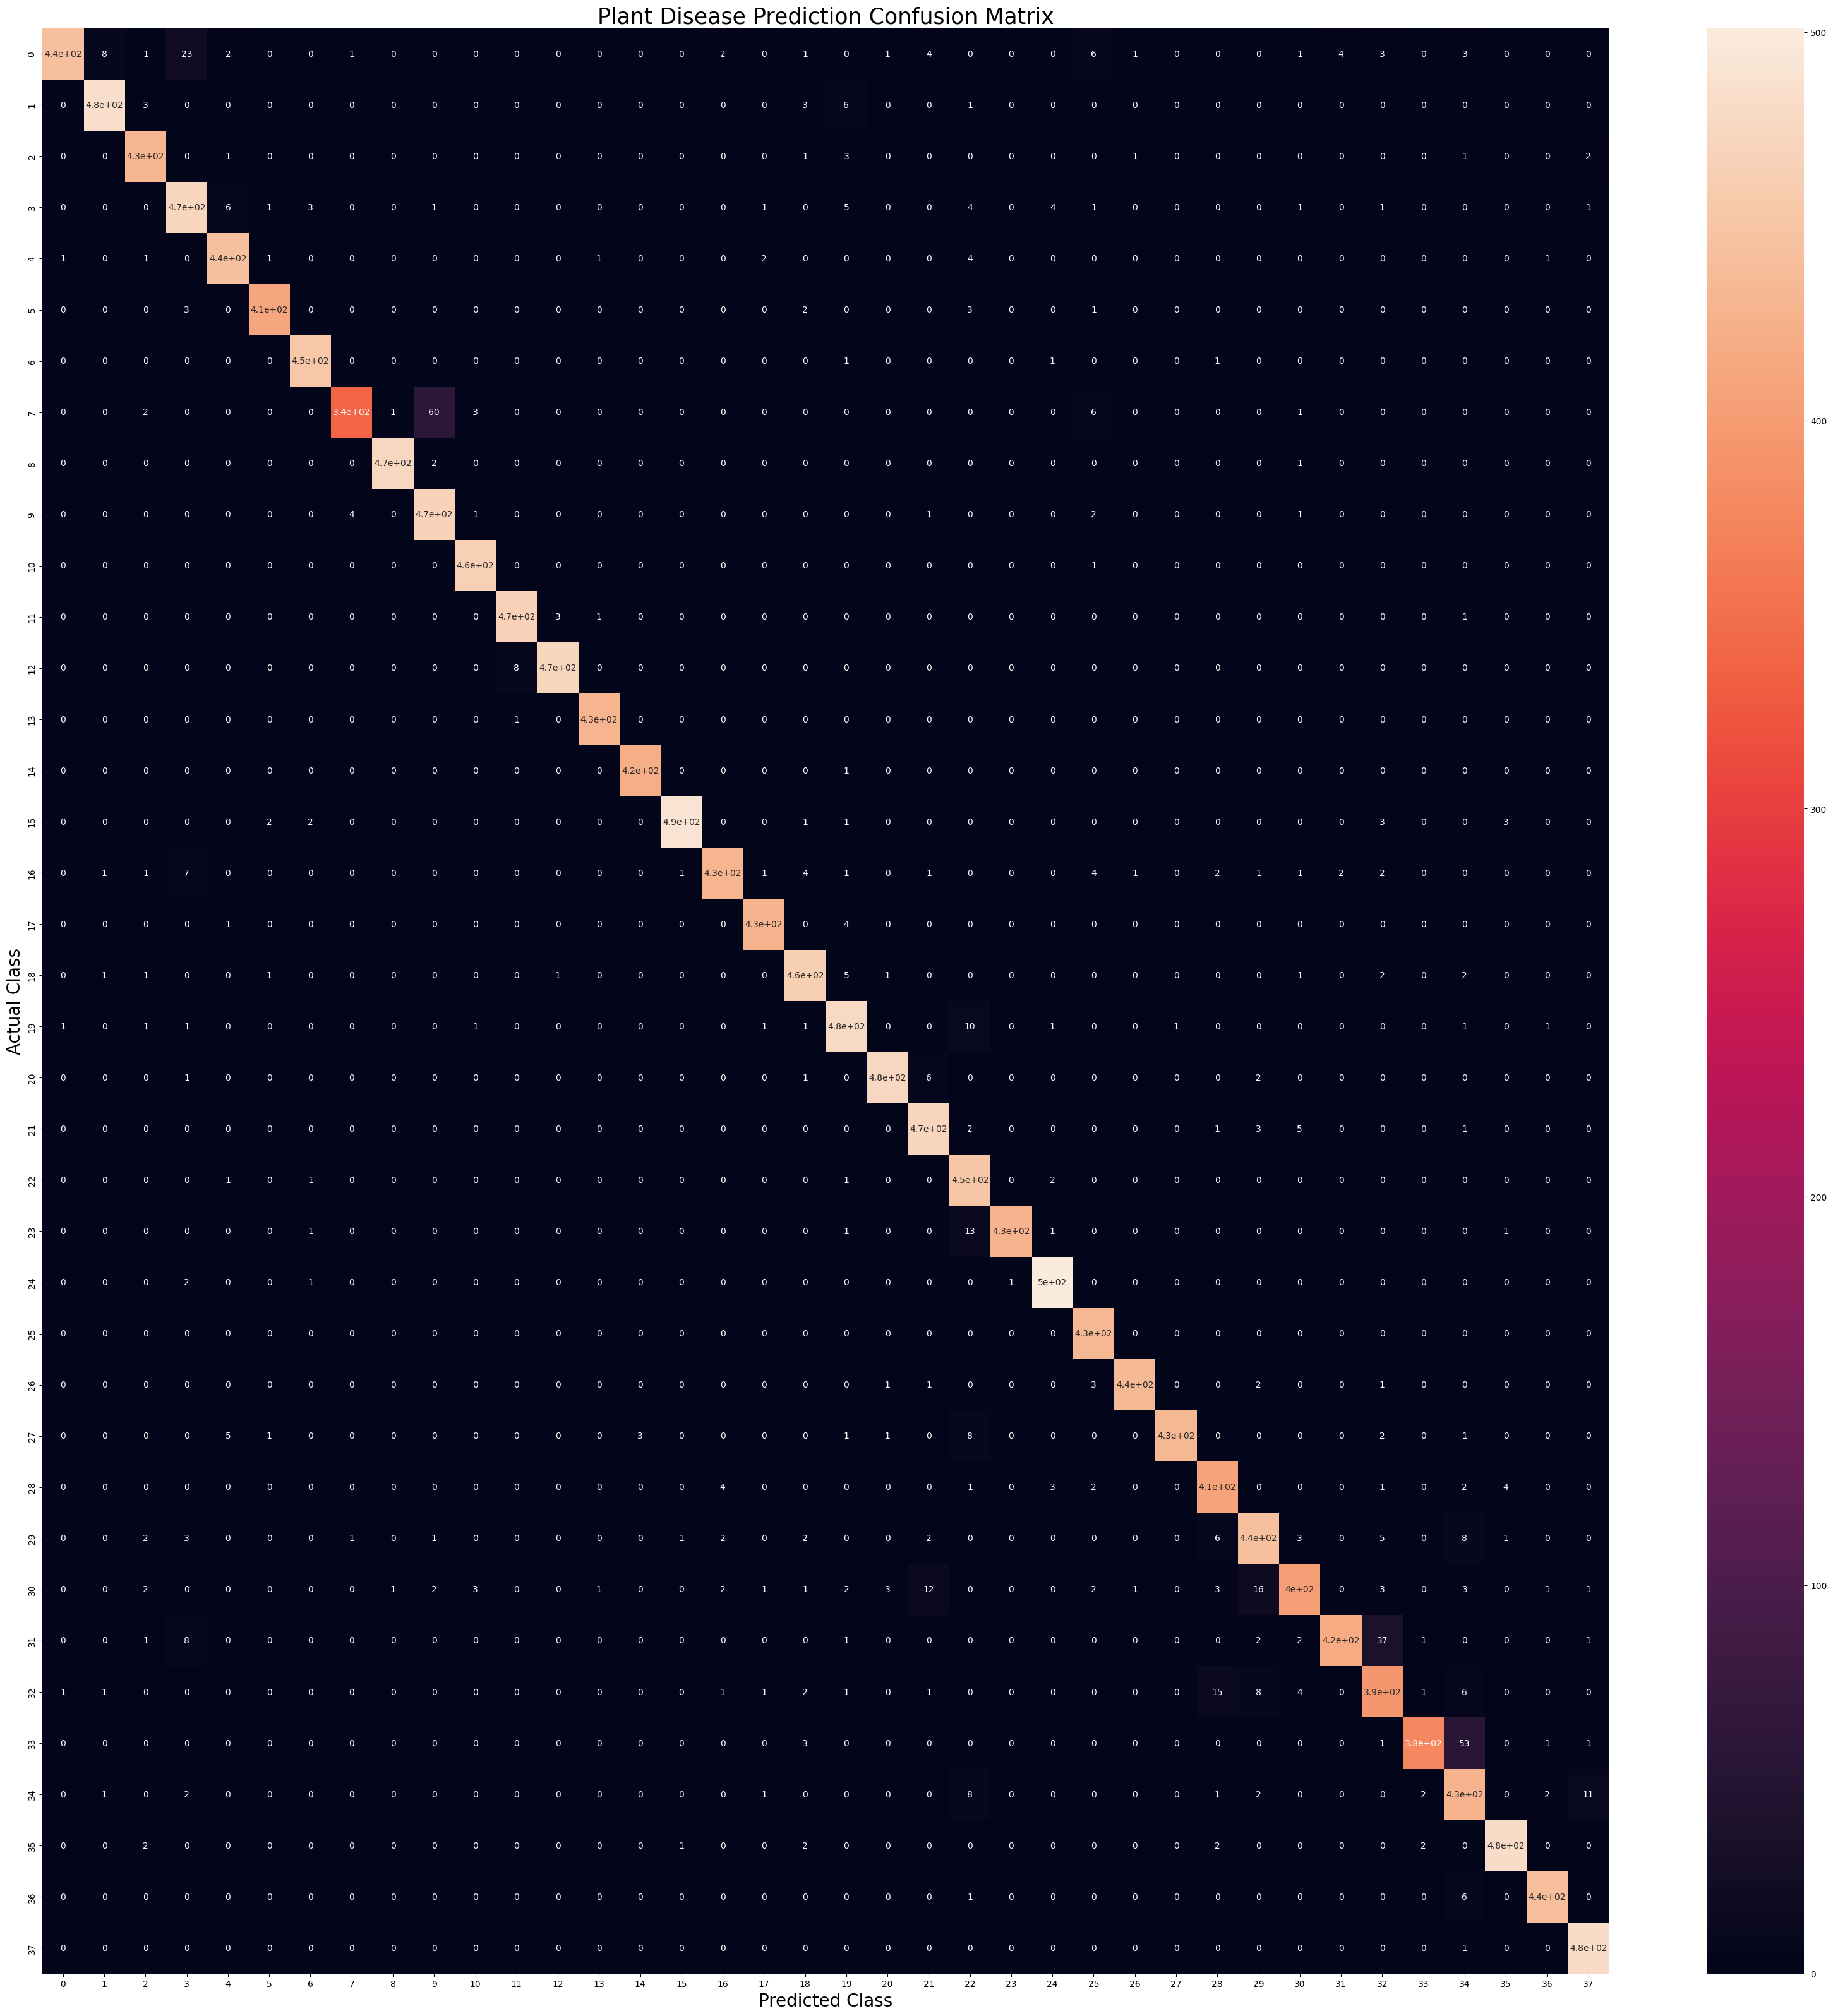

In [50]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()